# Quick little notebook to make some illustrative figures of changing parameters in a SIR model

In [79]:
# %matplotlib widget

import sys
sys.path.append("./../scripts")
import PandemiXFunctions as pf
import PandemiXModelFunctions as pmf


%matplotlib widget

plt.style.use('RasmusStyle.mplstyle')

plt.rcParams['figure.figsize'] = (12,8)
plt.style.use('RasmusStyle.mplstyle')

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['figure.facecolor'] = (1,1,1,1)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)

import datetime
             
from scipy.integrate import cumtrapz
# int_I = cumtrapz(np.exp(u_H*ts)*Is,ts, initial=0)
# Hs = np.exp(-u_H*ts) * (r_chr*pars_full['gamma']*int_I + k) 

In [80]:
modelMeta = (
    {
        'beta * S * I' : ['S','I'],
        'gamma * I' : ['I','R'],
    },
    ['S','I','R'],
    ['beta','gamma']
)
modelMetaDeath = (
    {
        'beta * S * I' : ['S','I'],
        # 'gamma * I' : ['I','R'],
        # 'delta * I' : ['I','D']
        'gamma * (1 - delta) * I' : ['I','R'],
        'gamma * delta * I' : ['I','D']
    },
    ['S','I','R','D'],
    ['beta','gamma','delta']
)

In [81]:
# Initialize everything
popSize = 5000
iniInf = 1 
I_0 = iniInf / popSize
R_0 = 0
S_0 = 1 - I_0 - R_0 

init1 = {'S' : S_0,'I':I_0,'R':R_0}

gamma = 1/3
beta  = 2 * gamma 
pars1 = {'beta':beta,'gamma':gamma}


tEnd = 100 
sch1 = pmf.Scheme(modelMeta,init1,pars1,0,tEnd,Changes=[])
sch1.simulate(tRes=1000)
res1 = sch1.result 

In [82]:
# Initialize everything
# popSize = 5000
# iniInf = 1 
# I_0 = iniInf / popSize
# R_0 = 0
D_0 = 0
S_0 = 1 - I_0 - R_0 - D_0

init2 = {'S' : S_0,'I':I_0,'R':R_0,'D':D_0}

# gamma = 1/3
# beta  = 2 * gamma 
delta = 0.1
pars2 = {'beta':beta,'gamma':gamma,'delta':delta}


tEnd = 100 
sch2 = pmf.Scheme(modelMetaDeath,init2,pars2,0,tEnd,Changes=[])
sch2.simulate(tRes=1000)
res2 = sch2.result 

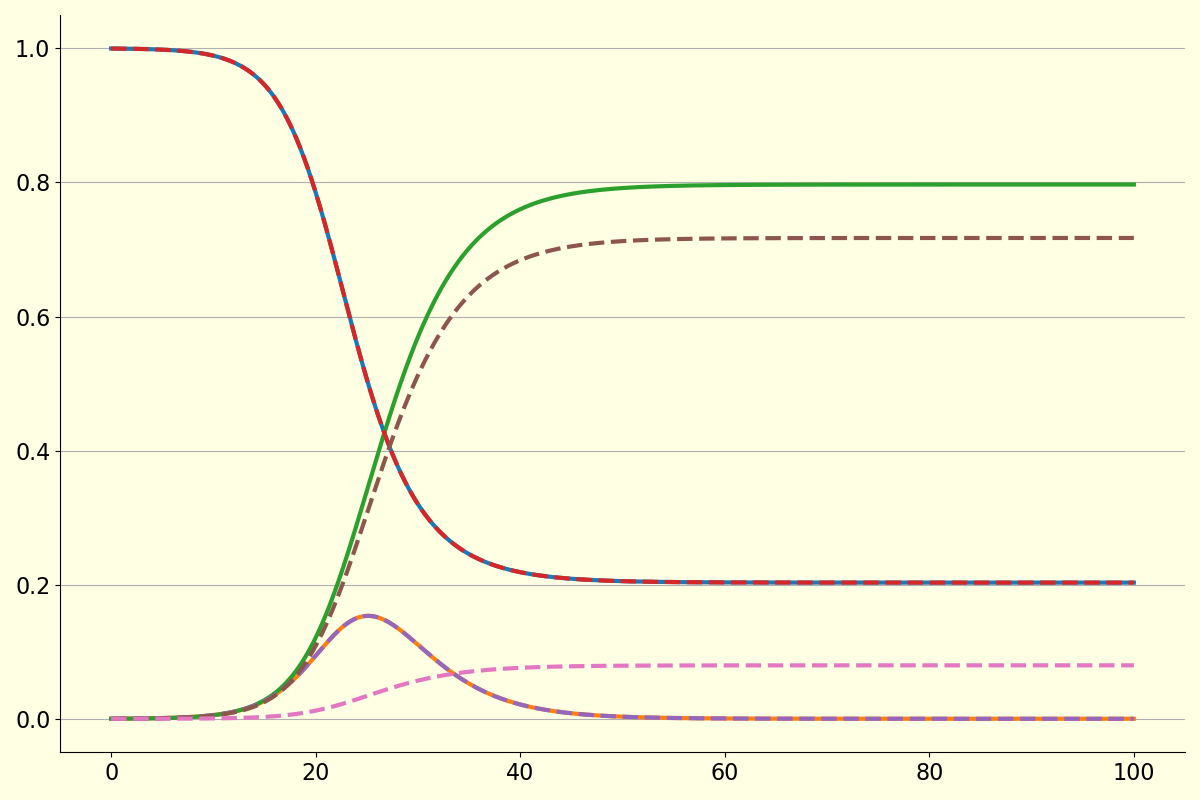

In [83]:
fig,ax = plt.subplots()
fig.set_facecolor('xkcd:off white')


ax.plot(res1.t,res1.S)
ax.plot(res1.t,res1.I)
ax.plot(res1.t,res1.R)

ax.plot(res2.t,res2.S,'--')
ax.plot(res2.t,res2.I,'--')
ax.plot(res2.t,res2.R,'--')
ax.plot(res2.t,res2.D,'--')


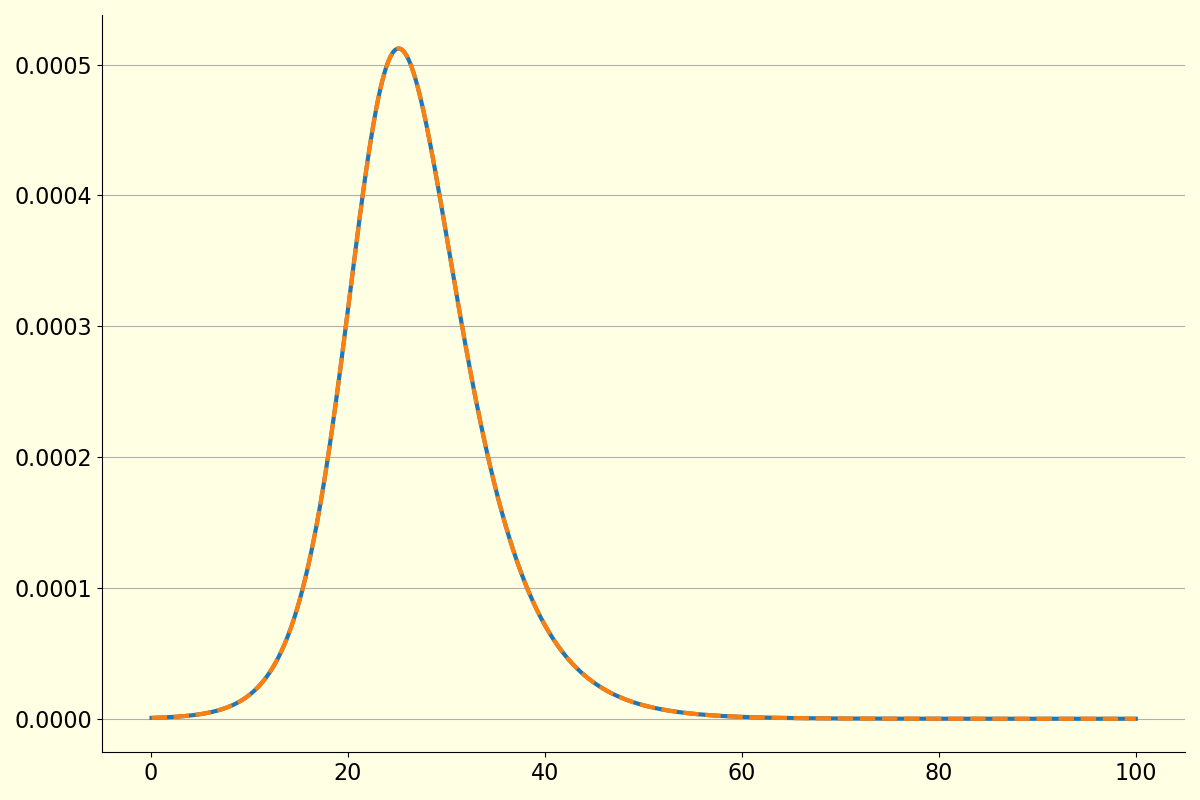

In [84]:
fig,ax = plt.subplots()
fig.set_facecolor('xkcd:off white')

ax.plot(res1.t[1:],np.diff(res1.R)*delta)
ax.plot(res2.t[1:],np.diff(res2.D),'--')

# Show different scenarios

1: Baseline

2: More infectious (beta++)

3: Longer recovery time (gamma++)

4: Higher mortality (delta++)

In [137]:
# Initialize everything
popSize = 1000
iniInf = 1
I_0 = iniInf / popSize
R_0 = 0
S_0 = 1 - I_0 - R_0 

init1 = {'S' : S_0,'I':I_0,'R':R_0}

# gamma = 1/3
# beta  = 2 * gamma 
# delta = 1/3
beta  = 0.6
gamma = 0.3
delta = 0.2


tEnd = 54


pars = {'beta':beta,'gamma':gamma}
sch1 = pmf.Scheme(modelMeta,init1,pars,0,tEnd,Changes=[])
sch1.simulate(tRes=1000)
res1 = sch1.result 


pars = {'beta':1,'gamma':gamma}
# pars = {'beta':1.5*gamma,'gamma':gamma}
sch2 = pmf.Scheme(modelMeta,init1,pars,0,tEnd,Changes=[])
sch2.simulate(tRes=1000)
res2 = sch2.result 

pars = {'beta':beta,'gamma':0.4}
sch3 = pmf.Scheme(modelMeta,init1,pars,0,tEnd,Changes=[])
sch3.simulate(tRes=1000)
res3 = sch3.result 

# pars = {'beta':beta,'gamma':gamma}
# sch4 = pmf.Scheme(modelMeta,init1,pars,0,tEnd,Changes=[])
# sch4.simulate(tRes=1000)
# res4 = sch4.result 

d1 = delta * res1.R
d2 = delta * res2.R
d3 = delta * res3.R
# d4 = delta * res1.R * 1.5
d4 = 0.4 * res1.R 

In [138]:
# print(1.5*beta)
# print(1.5*gamma)
# print(1.5*delta)

In [139]:

tRange = np.arange(0,tEnd,1)

d1i = np.interp(tRange,res1.t,d1)
d2i = np.interp(tRange,res2.t,d2)
d3i = np.interp(tRange,res3.t,d3)
d4i = np.interp(tRange,res1.t,d4)


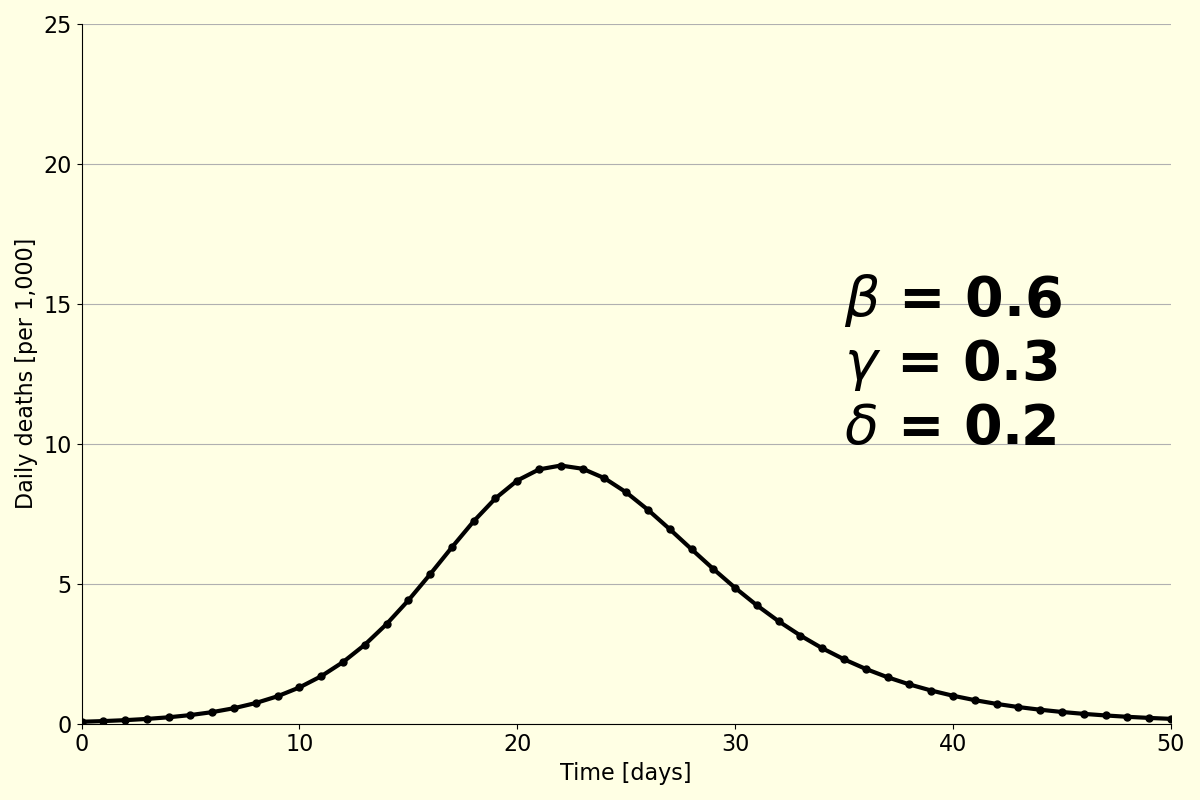

In [140]:
fig,ax = plt.subplots()
fig.set_facecolor('xkcd:off white')
ax.plot(tRange[:-1],popSize*np.diff(d1i),'k.-',label='Baseline')

# ax.legend()
ax.set_xlabel('Time [days]')
ax.set_ylabel('Daily deaths [per 1,000]')

ax.set_ylim(bottom=0,top=25)
ax.set_xlim(left=0,right=50)
fig.tight_layout()

# cur1 = r'$\beta$ = $\frac{2}{3}$'
# cur2 = r'$\gamma$ = $\frac{1}{3}$'
# cur3 = r'$\delta$ = $\frac{1}{3}$'
cur1 = r'$\beta$ = 0.6' 
cur2 = r'$\gamma$ = 0.3'
cur3 = r'$\delta$ = 0.2'
curLabel = f'{cur1}\n{cur2}\n{cur3}'
ax.text(35,10,curLabel,fontsize=40,fontweight='bold')
fig.savefig('SIR_example_Fig1')

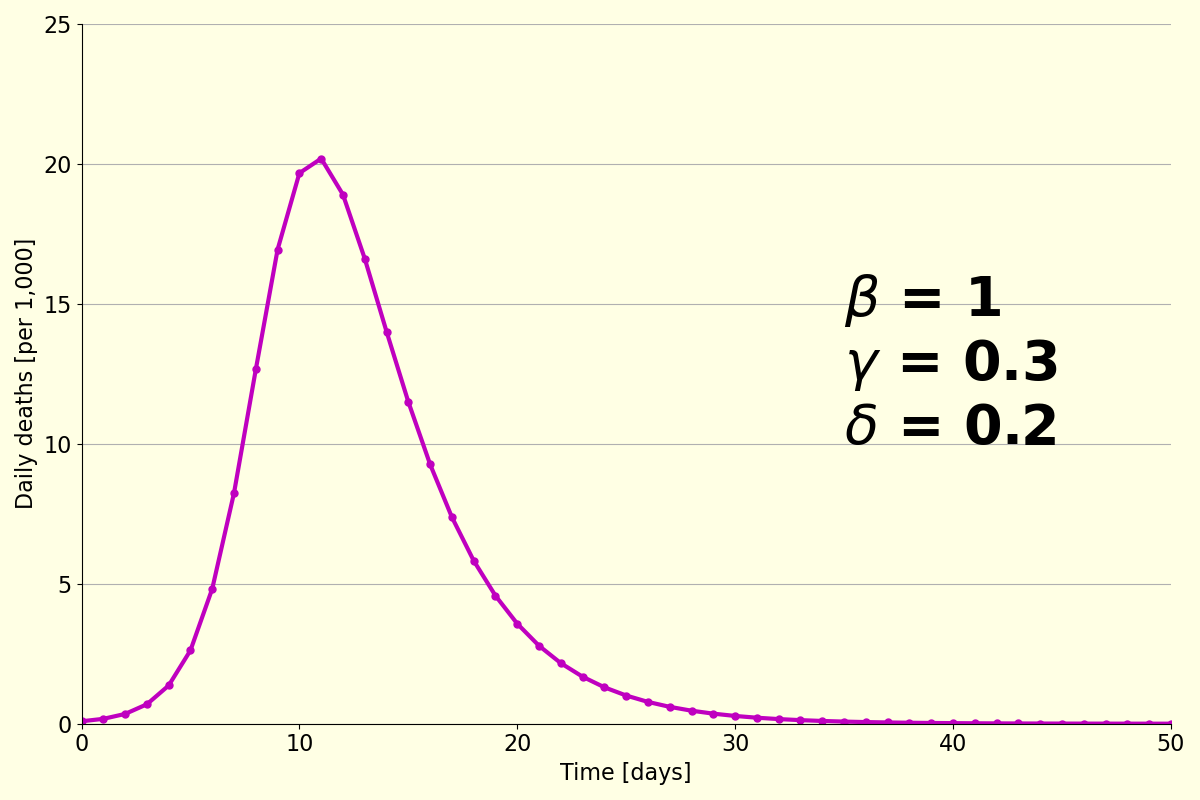

In [141]:

fig,ax = plt.subplots()
fig.set_facecolor('xkcd:off white')
ax.plot(tRange[:-1],popSize*np.diff(d2i),'m.-',label=r'$\beta$ = 1')


ax.set_xlabel('Time [days]')
ax.set_ylabel('Daily deaths [per 1,000]')

ax.set_ylim(bottom=0,top=25)
ax.set_xlim(left=0,right=50)
fig.tight_layout()

cur1 = r'$\beta$ = 1' 
cur2 = r'$\gamma$ = 0.3'
cur3 = r'$\delta$ = 0.2'
curLabel = f'{cur1}\n{cur2}\n{cur3}'
ax.text(35,10,curLabel,fontsize=40,fontweight='bold')
fig.savefig('SIR_example_Fig2')

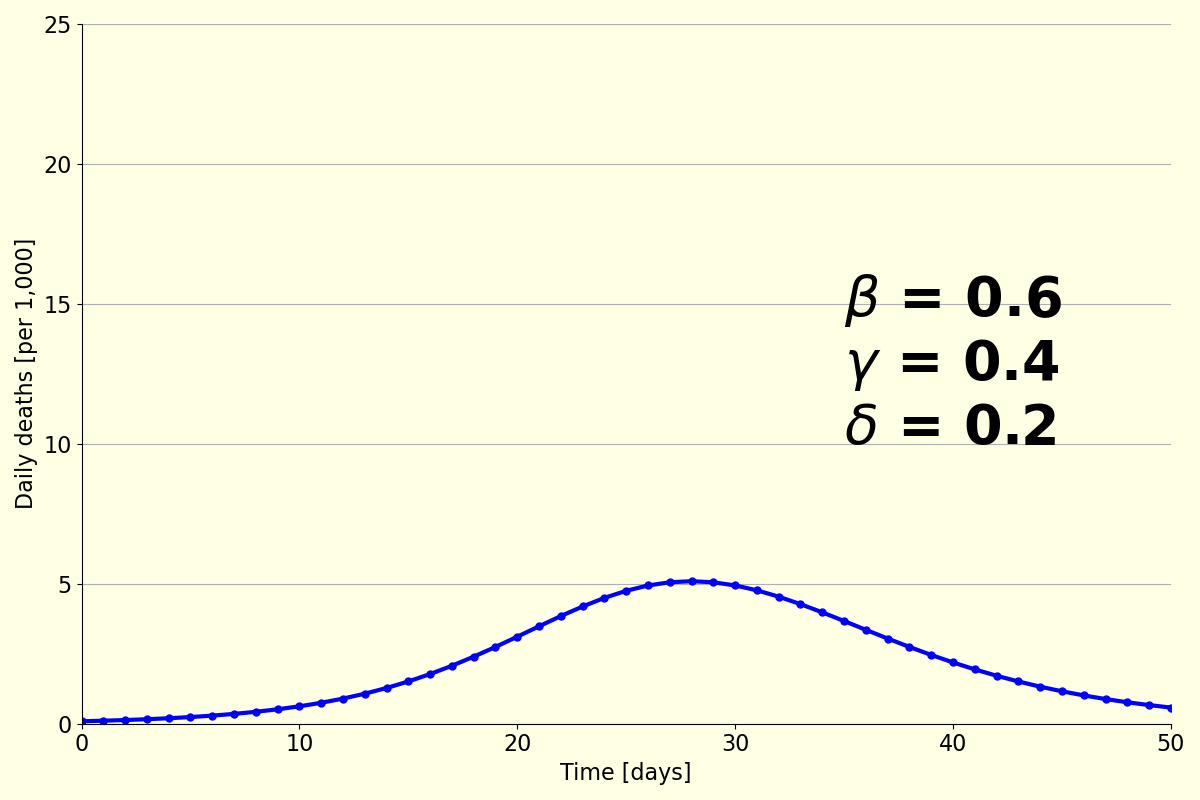

In [142]:

fig,ax = plt.subplots()
fig.set_facecolor('xkcd:off white')
ax.plot(tRange[:-1],popSize*np.diff(d3i),'b.-',label=r'$\gamma$ = 0.5')

ax.set_xlabel('Time [days]')
ax.set_ylabel('Daily deaths [per 1,000]')

ax.set_ylim(bottom=0,top=25)
ax.set_xlim(left=0,right=50)
fig.tight_layout()

cur1 = r'$\beta$ = 0.6' 
cur2 = r'$\gamma$ = 0.4'
cur3 = r'$\delta$ = 0.2'
curLabel = f'{cur1}\n{cur2}\n{cur3}'
ax.text(35,10,curLabel,fontsize=40,fontweight='bold')
fig.savefig('SIR_example_Fig3')

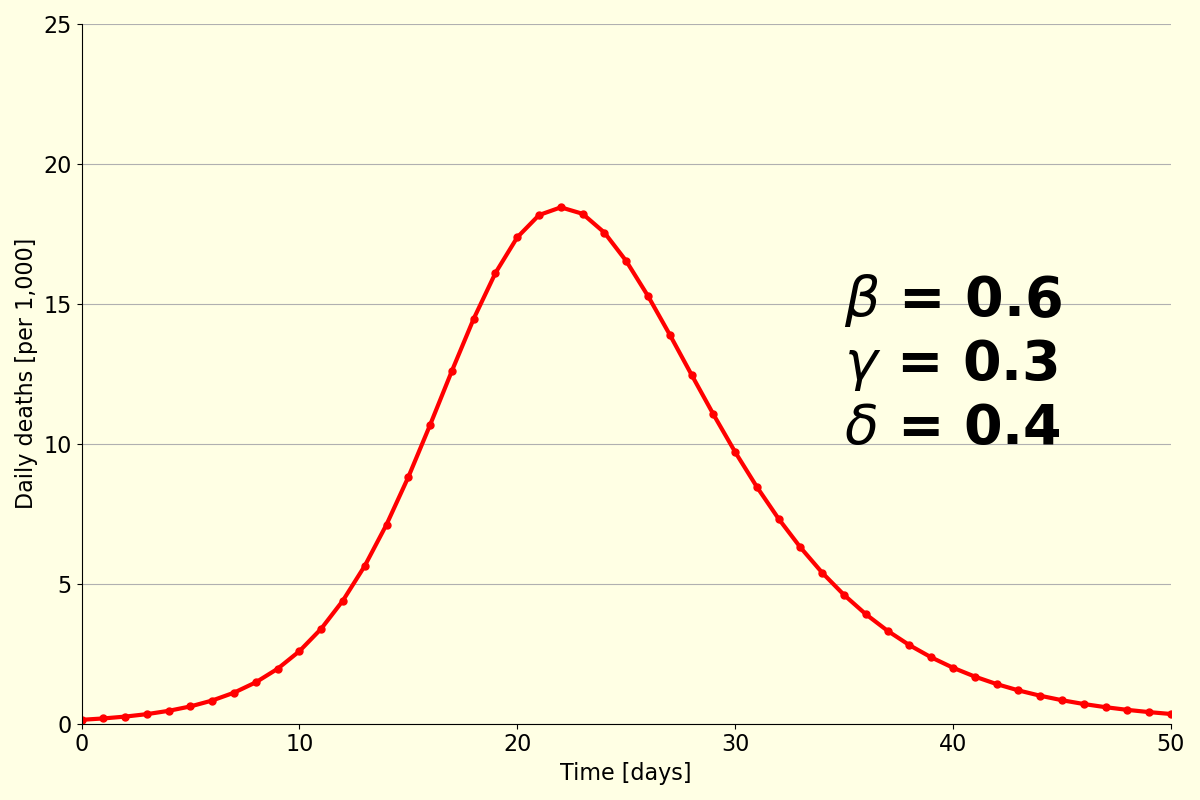

In [144]:

fig,ax = plt.subplots()
fig.set_facecolor('xkcd:off white')
ax.plot(tRange[:-1],popSize*np.diff(d4i),'r.-',label=r'$\delta$ = 0.5')

ax.set_xlabel('Time [days]')
ax.set_ylabel('Daily deaths [per 1,000]')

ax.set_ylim(bottom=0,top=35)
ax.set_ylim(bottom=0,top=25)
ax.set_xlim(left=0,right=50)
fig.tight_layout()

cur1 = r'$\beta$ = 0.6' 
cur2 = r'$\gamma$ = 0.3'
cur3 = r'$\delta$ = 0.4'
curLabel = f'{cur1}\n{cur2}\n{cur3}'
ax.text(35,10,curLabel,fontsize=40,fontweight='bold')
fig.savefig('SIR_example_Fig4')

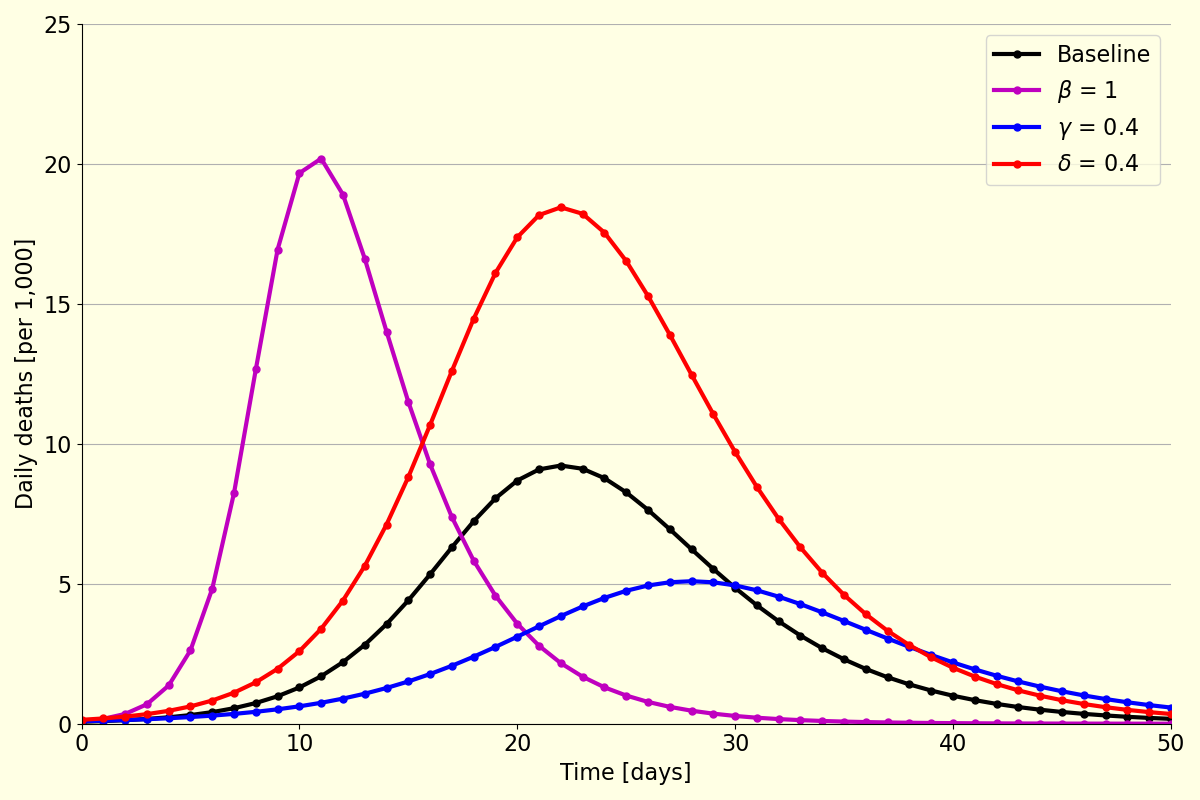

In [147]:

fig,ax = plt.subplots()
fig.set_facecolor('xkcd:off white')
# ax.plot(res1.t[1:],popSize*np.diff(d1),label='Scenario 1')
# ax.plot(res2.t[1:],popSize*np.diff(d2),label='Scenario 2')
# ax.plot(res3.t[1:],popSize*np.diff(d3),label='Scenario 3')
# ax.plot(res1.t[1:],popSize*np.diff(d4),label='Scenario 4')
ax.plot(tRange[:-1],popSize*np.diff(d1i),'k.-',label='Baseline')
ax.plot(tRange[:-1],popSize*np.diff(d2i),'m.-',label=r'$\beta$ = 1')
ax.plot(tRange[:-1],popSize*np.diff(d3i),'b.-',label=r'$\gamma$ = 0.4')
ax.plot(tRange[:-1],popSize*np.diff(d4i),'r.-',label=r'$\delta$ = 0.4')

ax.legend()

ax.set_xlabel('Time [days]')
ax.set_ylabel('Daily deaths [per 1,000]')

ax.set_ylim(bottom=0,top=25)
ax.set_xlim(left=0,right=50)
fig.tight_layout()

fig.savefig('SIR_example_AllTogether')